Xarray, NetCDF 
 - 
 - xarray was developed by oceanographers
 

In [4]:
import numpy as np
import scipy as sp
import xarray as xr
import pandas as pd
import cartopy
import cartopy.feature as cfeature 
import matplotlib.pyplot as plt
import cmocean 
from cmocean import cm

In [5]:
temp_url = ("https://www.ncei.noaa.gov/thredds-ocean/dodsC/ncei/woa/temperature/decav/1.00/woa18_decav_t00_01.nc")
MLD_url = ("https://www.ncei.noaa.gov/thredds-ocean/dodsC/ncei/woa/mld/A5B7/1.00/woa18_A5B7_M0200_01.nc")
AOU_url = ("https://www.ncei.noaa.gov/thredds-ocean/dodsC/ncei/woa/AOU/all/1.00/woa18_all_A00_01.nc")
DO_url = ("https://www.ncei.noaa.gov/thredds-ocean/dodsC/ncei/woa/oxygen/all/1.00/woa18_all_o00_01.nc")
global_bath = ("https://www.ngdc.noaa.gov/thredds/dodsC/global/ETOPO1_Bed_g_gmt4.nc")

In [6]:
temp = xr.open_dataset(temp_url, decode_times=False)
mld = xr.open_dataset(MLD_url, decode_times = False)
aou = xr.open_dataset(AOU_url, decode_times = False)
do = xr.open_dataset(DO_url, decode_times = False)
bath = xr.open_dataset(global_bath, decode_times = False)

In [7]:
bath

<xarray.Dataset>
Dimensions:  (lon: 21601, lat: 10801)
Coordinates:
  * lon      (lon) float64 -180.0 -180.0 -180.0 -179.9 ... 180.0 180.0 180.0
  * lat      (lat) float64 -90.0 -89.98 -89.97 -89.95 ... 89.95 89.97 89.98 90.0
Data variables:
    z        (lat, lon) float32 ...
Attributes: (12/13)
    Conventions:                CF-1.4
    title:                      ETOPO1_Bed_g.int.grd
    history:                    grdreformat ETOPO1_Bed_g_gmt4.grd ETOPO1_Bed_...
    GMT_version:                4.5.1 [64-bit]
    node_offset:                0
    geospatial_lat_resolution:  0.016667
    ...                         ...
    geospatial_lat_min:         -90.0
    geospatial_lat_max:         90.0
    geospatial_lon_min:         -180.0
    geospatial_lon_max:         180.0
    geospatial_lat_units:       degrees_north
    geospatial_lon_units:       degrees_east

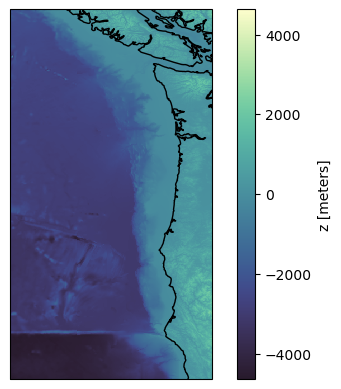

In [8]:
#bath.z.sel(lat=0,10,lon=-40,-30).plot(vmax=5, cmap = 'plasma')
proj = cartopy.crs.PlateCarree()
ax=plt.axes(projection=proj)
ax.coastlines()

reversed_deep = cmocean.cm.deep.reversed()

bath.z.sel(lat=slice(39, 50), lon=slice(-129, -123)).plot(cmap=reversed_deep)

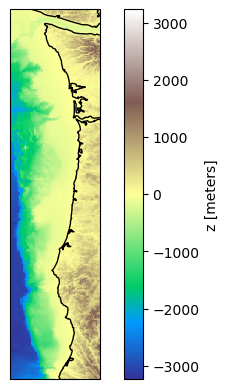

In [113]:
proj = cartopy.crs.PlateCarree()
ax=plt.axes(projection=proj)
ax.coastlines()
bplot = bath.z.sel(lat=slice(40.4, 48.7), lon=slice(-125.5, -123.5)).plot(cmap=('terrain'))

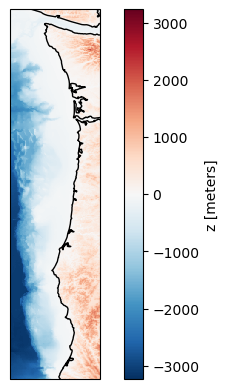

In [112]:
proj = cartopy.crs.PlateCarree()
ax=plt.axes(projection=proj)
ax.coastlines()
bplot = bath.z.sel(lat=slice(40.4, 48.7), lon=slice(-125.5, -123.5)).plot()

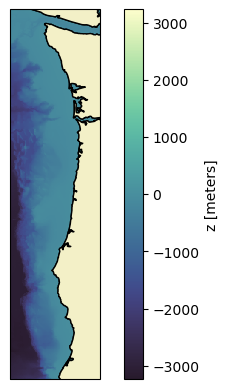

In [136]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature

# Create the PlateCarree projection
proj = ccrs.PlateCarree()

# Create a figure and axis with the PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': proj})

# Add coastlines
ax.coastlines()

# Select a subset of bathymetry data
subset_bath = bath.z.sel(lat=slice(40.4, 48.7), lon=slice(-125.5, -123.5))

# Create a land mask
land_10m = NaturalEarthFeature(
    'physical', 'land', '10m',
    edgecolor='k', facecolor='#F3F0C7'
)

# Plot the land mask over the selected region
ax.add_feature(land_10m)

# Plot the bathymetry data over the land mask
reversed_deep = cmocean.cm.deep.reversed()

bplot = subset_bath.plot(cmap=reversed_deep)
#bplot = subset_bath.plot(cmap='viridis')


plt.show()

In [9]:
temp

<xarray.Dataset>
Dimensions:             (lat: 180, nbounds: 2, lon: 360, depth: 102, time: 1)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * depth               (depth) float32 0.0 5.0 10.0 ... 5.3e+03 5.4e+03 5.5e+03
  * time                (time) float32 4.326e+03
Dimensions without coordinates: nbounds
Data variables:
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    t_an                (time, depth, lat, lon) float32 ...
    t_mn                (time, depth, lat, lon) float32 ...
    t_dd                (time, depth, lat, lon) float64 ...
    t_sd                (time, depth, lat, lon) float32 ...
    t_se                (time, depth, lat, lon) float32 ...
    t_oa                (time, depth, lat, lon) float32 ...
    t_gp                (time, depth, lat, lon) float64 ...
Attributes: (12/49)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           World Ocean Atlas 2018 : sea_water_tempe...
    summary:                         Climatological mean temperature for the ...
    references:                      Locarnini, R. A., A. V. Mishonov, O. K. ...
    institution:                     National Centers for Environmental Infor...
    comment:                         global climatology as part of the World ...
    ...                              ...
    publisher_email:                 NCEI.info@noaa.gov
    nodc_template_version:           NODC_NetCDF_Grid_Template_v2.0
    license:                         These data are openly available to the p...
    metadata_link:                   https://www.nodc.noaa.gov/OC5/woa18/
    date_created:                    2019-07-28 
    date_modified:                   2019-07-28

In [10]:
mld

<xarray.Dataset>
Dimensions:             (lat: 180, nbounds: 2, lon: 360, depth: 1, time: 1)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * depth               (depth) float32 0.0
  * time                (time) float32 726.0
Dimensions without coordinates: nbounds
Data variables:
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    M_an                (time, depth, lat, lon) float32 ...
    M_mn                (time, depth, lat, lon) float32 ...
    M_dd                (time, depth, lat, lon) float64 ...
    M_sd                (time, depth, lat, lon) float32 ...
    M_se                (time, depth, lat, lon) float32 ...
    M_oa                (time, depth, lat, lon) float32 ...
    M_gp                (time, depth, lat, lon) float64 ...
Attributes: (12/46)
    Conventions:                     CF-1.6
    title:                           World Ocean Atlas 2018 : ocean_mixed_lay...
    summary:                         Climatological mean mixed layer depth fo...
    references:                      Locarnini, R. A., A. V. Mishonov, O. K. ...
    institution:                     NOAA National Center for Environmental I...
    comment:                         Global Climatology as part of the World ...
    ...                              ...
    license:                         These data are openly available to the p...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    metadata_link:                   https://www.ncei.noaa.gov/products/world...
    date_created:                    2020-05-18 
    date_modified:                   2020-05-18 
    comments:                        Zweng, M. M., J. R. Reagan, D. Seidov, T...

In [11]:
aou

<xarray.Dataset>
Dimensions:             (lat: 180, nbounds: 2, lon: 360, depth: 102, time: 1)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * depth               (depth) float32 0.0 5.0 10.0 ... 5.3e+03 5.4e+03 5.5e+03
  * time                (time) float32 8.214e+03
Dimensions without coordinates: nbounds
Data variables:
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    A_an                (time, depth, lat, lon) float32 ...
    A_mn                (time, depth, lat, lon) float32 ...
    A_dd                (time, depth, lat, lon) float64 ...
    A_sd                (time, depth, lat, lon) float32 ...
    A_se                (time, depth, lat, lon) float32 ...
    A_oa                (time, depth, lat, lon) float32 ...
    A_gp                (time, depth, lat, lon) float64 ...
Attributes: (12/49)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           World Ocean Atlas 2018 : Apparent_Oxygen...
    summary:                         Climatological mean Apparent Oxygen Util...
    references:                      Garcia, H. E., K. Weathers, C. R. Paver,...
    institution:                     National Centers for Environmental Infor...
    comment:                         global climatology as part of the World ...
    ...                              ...
    publisher_email:                 NCEI.info@noaa.gov
    nodc_template_version:           NODC_NetCDF_Grid_Template_v2.0
    license:                         These data are openly available to the p...
    metadata_link:                   https://www.nodc.noaa.gov/OC5/woa18/
    date_created:                    2019-07-29 
    date_modified:                   2019-07-29

In [12]:
do

<xarray.Dataset>
Dimensions:             (lat: 180, nbounds: 2, lon: 360, depth: 102, time: 1)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * depth               (depth) float32 0.0 5.0 10.0 ... 5.3e+03 5.4e+03 5.5e+03
  * time                (time) float32 8.214e+03
Dimensions without coordinates: nbounds
Data variables:
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    o_an                (time, depth, lat, lon) float32 ...
    o_mn                (time, depth, lat, lon) float32 ...
    o_dd                (time, depth, lat, lon) float64 ...
    o_sd                (time, depth, lat, lon) float32 ...
    o_se                (time, depth, lat, lon) float32 ...
    o_oa                (time, depth, lat, lon) float32 ...
    o_gp                (time, depth, lat, lon) float64 ...
Attributes: (12/49)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           World Ocean Atlas 2018 : mole_concentrat...
    summary:                         Climatological mean dissolved oxygen for...
    references:                      Garcia, H. E., K. Weathers, C. R. Paver,...
    institution:                     National Centers for Environmental Infor...
    comment:                         global climatology as part of the World ...
    ...                              ...
    publisher_email:                 NCEI.info@noaa.gov
    nodc_template_version:           NODC_NetCDF_Grid_Template_v2.0
    license:                         These data are openly available to the p...
    metadata_link:                   https://www.nodc.noaa.gov/OC5/woa18/
    date_created:                    2019-07-29 
    date_modified:                   2019-07-29

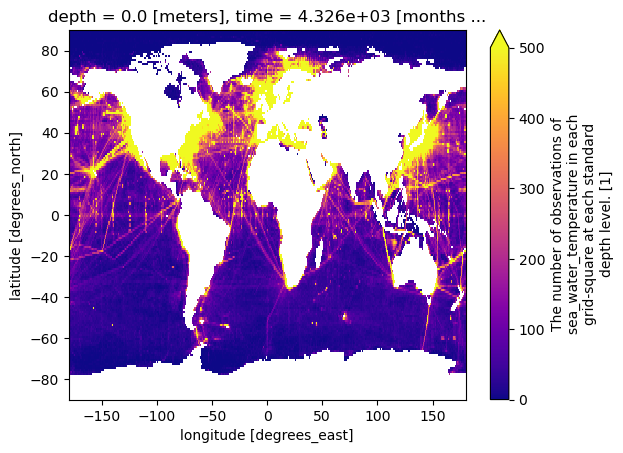

In [13]:
temp.t_dd.sel(depth=0).plot(vmax=500, cmap = 'plasma')

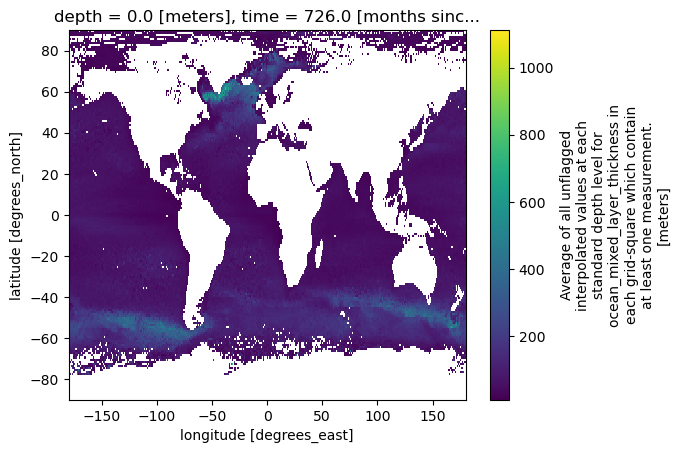

In [14]:
mld.M_mn.sel(depth = 10, method ='nearest').plot()

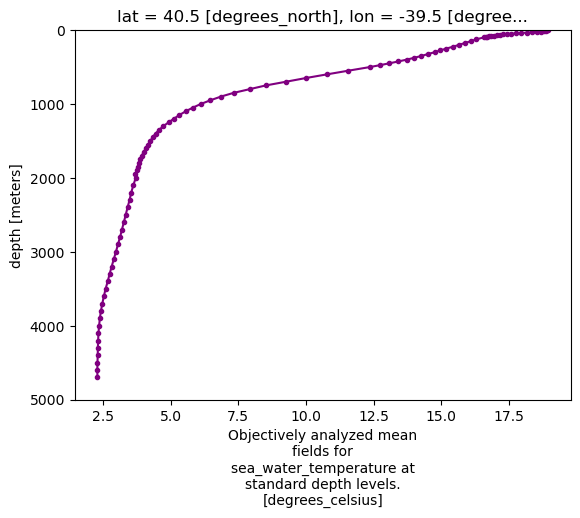

In [43]:
temp.t_an.sel(lat=40,lon=-40, method='nearest').plot(y='depth', ylim=(5000,0), ls='-', marker = '.', color = 'purple') #ls stands for 'line style', marker puts points at the discrerte or binned values

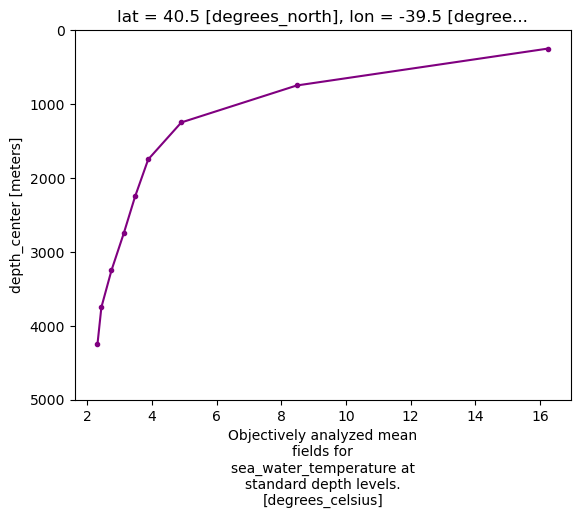

In [47]:
temp.t_an.sel(lat=40,lon=-40, method='nearest').groupby_bins('depth', np.arange(0,5000, 500)).mean().plot( #np.arange specifies the range of data to bin, then the bin size
    y='depth_bins', ylim=(5000,0), ls='-', marker = '.', color = 'purple') 

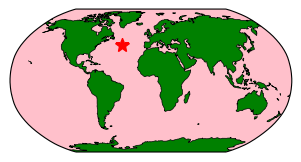

In [38]:
import cartopy.crs as crs

#Create a figure
fig = plt.figure(figsize=(8,4))

#Create a subplot
ax1 = plt.subplot(1,2,1,projection=crs.Robinson(central_longitude=0))

ax1.coastlines(lw=0.5)

#ax1.stock_img()

ax1.add_feature(cfeature.OCEAN, facecolor ='pink')
ax1.add_feature(cfeature.LAND, facecolor ='green')

ax1.plot(-40,40,'r*',markersize=10, transform=crs.PlateCarree())

ax1.set_global()

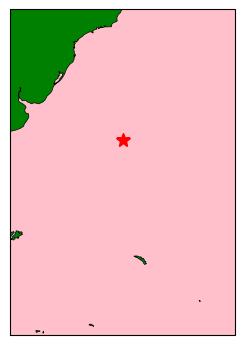

In [42]:
#Create a subplot
ax2 = plt.subplot(1,2,1,projection=crs.Mercator(central_longitude=0))

ax2.coastlines(lw=0.5)

#ax1.stock_img()

ax2.add_feature(cfeature.OCEAN, facecolor ='pink')
ax2.add_feature(cfeature.LAND, facecolor ='green')

ax2.plot(-40,-40,'r*',markersize=10, transform=crs.PlateCarree())

#ax2.set_global()
ax2.set_extent([-60,-20,-60,-20])

#Jess has code for adding lat and lon, she will be adding this to Cnvas or Git


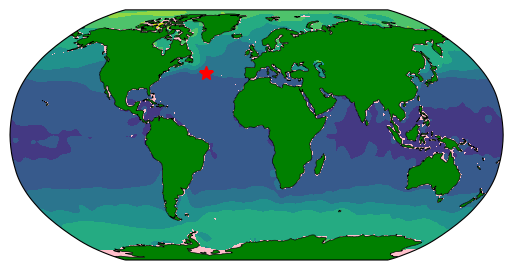

In [59]:
#Create a figure
fig = plt.figure(figsize=(14,5))

#Create a subplot
ax1 = plt.subplot(1,2,1,projection=crs.Robinson(central_longitude=0))

ax1.coastlines(lw=0.5)

#ax1.stock_img()

ax1.add_feature(cfeature.OCEAN, facecolor ='pink')
ax1.add_feature(cfeature.LAND, facecolor ='green')

ax1.plot(-40,40,'r*',markersize=10, transform=crs.PlateCarree(), zorder = 2)
ax1.contourf(do.lon,do.lat,do.o_an.sel(depth=10).isel(time=0),zorder=1, transform=crs.PlateCarree())

ax1.set_global()